In [2]:
# imports 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import ttest_ind
import datetime
# from ydata_profiling import ProfileReport

C:\Users\Hung Bui\AppData\Local\Temp\ipykernel_16120\2470002759.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
pd.set_option('display.max_columns', None)

In [4]:
# File path for csv File
filepath = "./../data/raw/datathon_2024_dataset.csv"
astro_df = pd.read_csv(filepath, index_col=0)
astro_df["game_date"] = [date[:4] + "-" + date[4:6] + "-" + date[6:] for date in astro_df["game_date"].astype(str)]
astro_df["game_date"] = pd.to_datetime(astro_df["game_date"])
astro_df["game_date"].dtypes

dtype('<M8[ns]')

In [5]:
hou_df = astro_df[(astro_df['home_team'] == 'HOU') | (astro_df['away_team'] == 'HOU')]
hou_df 

,game_date,home_team,away_team,is_day_game,home_score,away_score,venue,venue_name,city,state,home_pa,home_1b,home_2b,home_3b,home_hr,home_fo,home_so,home_bb,home_hbp,away_pa,away_1b,away_2b,away_3b,away_hr,away_fo,away_so,away_bb,away_hbp
19,2000-04-04,PIT,HOU,False,2,5,PIT07,Three Rivers Stadium,Pittsburgh,PA,37,3,1,0,1,20,6,6,0,36,5,0,0,1,21,5,3,1
32,2000-04-05,PIT,HOU,False,2,11,PIT07,Three Rivers Stadium,Pittsburgh,PA,43,6,2,1,1,14,12,7,0,38,7,2,0,0,24,2,3,0
46,2000-04-06,PIT,HOU,True,10,1,PIT07,Three Rivers Stadium,Pittsburgh,PA,31,0,2,0,0,18,8,3,0,44,9,4,1,2,15,9,4,0
57,2000-04-07,HOU,PHI,False,1,4,HOU03,Minute Maid Park,Houston,TX,35,3,1,0,2,21,5,3,0,32,4,0,0,1,20,5,2,0
72,2000-04-08,HOU,PHI,True,8,5,HOU03,Minute Maid Park,Houston,TX,38,7,3,0,1,19,4,3,1,38,6,1,2,2,19,5,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56701,2023-09-26,SEA,HOU,False,6,2,SEA03,Safeco Field,Seattle,WA,39,9,1,0,0,20,6,1,2,36,7,0,0,1,13,11,4,0
56717,2023-09-27,SEA,HOU,False,3,8,SEA03,Safeco Field,Seattle,WA,44,8,3,0,3,20,6,4,0,43,6,1,0,1,10,16,9,0
56730,2023-09-29,ARI,HOU,False,1,2,PHO01,Chase Field,Phoenix,AZ,34,6,2,0,0,15,10,1,0,35,2,2,0,0,23,4,4,0
56744,2023-09-30,ARI,HOU,False,0,1,PHO01,Chase Field,Phoenix,AZ,33,4,2,0,0,17,8,2,0,37,5,0,0,0,17,8,6,1


In [6]:
obpArr = []
consecutiveGamesArr = []
lastGameDate = None
for index, row in hou_df.iterrows():
    if lastGameDate == None:
        consecutiveGamesArr.append(0)
    elif row['game_date'] == lastGameDate + datetime.timedelta(days=1):
        consecutiveGamesArr.append(consecutiveGamesArr[-1] + 1)
    else:
        consecutiveGamesArr.append(0)
    lastGameDate = row['game_date']
        

    prefix = 'home_' if row['home_team'] == 'HOU' else 'away_'
    H = row[prefix+"1b"] + row[prefix+"2b"] + row[prefix+"3b"] + row[prefix+"hr"]
    obp = None
    if H != 0:
        obp = ((H + row[prefix+"bb"] + row[prefix+"hbp"]) / (row[prefix+"pa"]))

    obpArr.append(obp)
hou_df['obp'] = obpArr
hou_df['consecutiveGames'] = consecutiveGamesArr
hou_df["HouIsAway"] = [1 if team == "HOU" else 0 for team in hou_df["away_team"]]

hou_df

C:\Users\Hung Bui\AppData\Local\Temp\ipykernel_16120\320790381.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hou_df['obp'] = obpArr
C:\Users\Hung Bui\AppData\Local\Temp\ipykernel_16120\320790381.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hou_df['consecutiveGames'] = consecutiveGamesArr
C:\Users\Hung Bui\AppData\Local\Temp\ipykernel_16120\320790381.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

,game_date,home_team,away_team,is_day_game,home_score,away_score,venue,venue_name,city,state,home_pa,home_1b,home_2b,home_3b,home_hr,home_fo,home_so,home_bb,home_hbp,away_pa,away_1b,away_2b,away_3b,away_hr,away_fo,away_so,away_bb,away_hbp,obp,consecutiveGames,HouIsAway
19,2000-04-04,PIT,HOU,False,2,5,PIT07,Three Rivers Stadium,Pittsburgh,PA,37,3,1,0,1,20,6,6,0,36,5,0,0,1,21,5,3,1,0.277778,0,1
32,2000-04-05,PIT,HOU,False,2,11,PIT07,Three Rivers Stadium,Pittsburgh,PA,43,6,2,1,1,14,12,7,0,38,7,2,0,0,24,2,3,0,0.315789,1,1
46,2000-04-06,PIT,HOU,True,10,1,PIT07,Three Rivers Stadium,Pittsburgh,PA,31,0,2,0,0,18,8,3,0,44,9,4,1,2,15,9,4,0,0.454545,2,1
57,2000-04-07,HOU,PHI,False,1,4,HOU03,Minute Maid Park,Houston,TX,35,3,1,0,2,21,5,3,0,32,4,0,0,1,20,5,2,0,0.257143,3,0
72,2000-04-08,HOU,PHI,True,8,5,HOU03,Minute Maid Park,Houston,TX,38,7,3,0,1,19,4,3,1,38,6,1,2,2,19,5,3,0,0.394737,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56701,2023-09-26,SEA,HOU,False,6,2,SEA03,Safeco Field,Seattle,WA,39,9,1,0,0,20,6,1,2,36,7,0,0,1,13,11,4,0,0.333333,4,1
56717,2023-09-27,SEA,HOU,False,3,8,SEA03,Safeco Field,Seattle,WA,44,8,3,0,3,20,6,4,0,43,6,1,0,1,10,16,9,0,0.395349,5,1
56730,2023-09-29,ARI,HOU,False,1,2,PHO01,Chase Field,Phoenix,AZ,34,6,2,0,0,15,10,1,0,35,2,2,0,0,23,4,4,0,0.228571,0,1
56744,2023-09-30,ARI,HOU,False,0,1,PHO01,Chase Field,Phoenix,AZ,33,4,2,0,0,17,8,2,0,37,5,0,0,0,17,8,6,1,0.324324,1,1


c:\Users\Hung Bui\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='is_day_game', ylabel='home_score'>

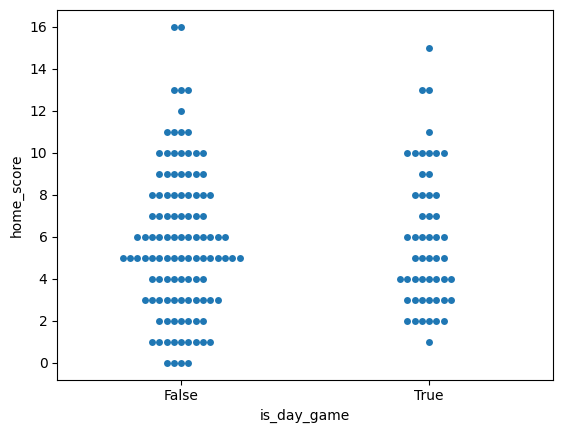

In [7]:
sns.swarmplot(data=hou_df[hou_df["game_date"].dt.year < 2001], x="is_day_game", y="home_score")

c:\Users\Hung Bui\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Hung Bui\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='game_date', ylabel='obp'>

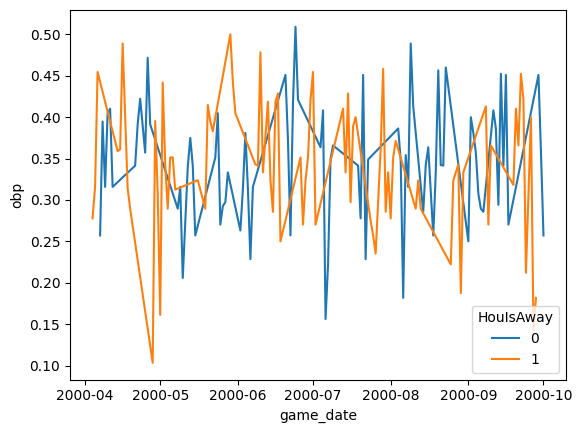

In [8]:
sns.lineplot(data=hou_df[hou_df["game_date"].dt.year < 2001], x="game_date", y="obp", hue="HouIsAway")

In [9]:
hou_df.dropna(subset=["obp"], inplace=True)

C:\Users\Hung Bui\AppData\Local\Temp\ipykernel_16120\1835416206.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hou_df.dropna(subset=["obp"], inplace=True)


<Axes: xlabel='obp', ylabel='Density'>

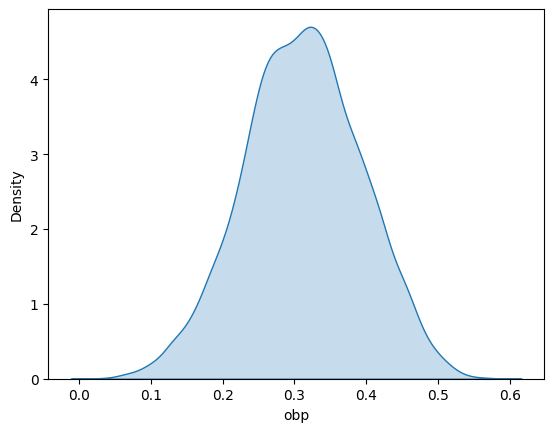

In [10]:
sns.kdeplot(x=hou_df["obp"], fill=True)

In [11]:
# The KDE plot shows that the distribution of OBP is somewhat normal, so we can use a t-test to compare the means of the two groups
# The null hypothesis is that the means of the two groups are equal

hou_df.groupby(by="HouIsAway")["obp"].mean()
ttest_ind(hou_df[hou_df["HouIsAway"] == 1]["obp"], hou_df[hou_df["HouIsAway"] == 0]["obp"])

# The p-value is less than 0.05, so we can reject the null hypothesis and conclude that the means of the two groups are not equal

TtestResult(statistic=7.343573810622198, pvalue=2.534155570417674e-13, df=3778.0)

In [12]:
hou_df[hou_df["HouIsAway"] == 1]["obp"].mean()
hou_df[hou_df["HouIsAway"] == 0]["obp"].mean()

0.3016858507571775

c:\Users\Hung Bui\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Hung Bui\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='consecutiveGames', ylabel='obp'>

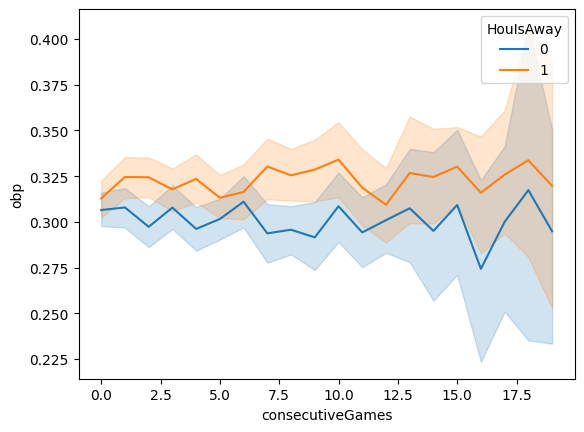

In [14]:
sns.lineplot(x="consecutiveGames", hue="HouIsAway", y="obp", data=hou_df)